### Property_Valuation_in_King_County_USA_using_AUTOML_and_Geo-enriched_data

### Table of Content

- [Introduction](#Introduction)
- [Necessary Imports](#Necessary-Imports)
- [Accessing the King County dataset for housing prediction](#Accessing-the-King-County-dataset-for-housing-prediction)
- [DataFrame & Definition](#DataFrame-&-Definition)
- [Exploring and Visualizing dataset Using Seaborn plots](#Visualizing-dataset)
- [Model Building using AutoML on King County housing dataset](#Model-building)
- [GeoEnriching the dataset using data enrich tool/Enriching the point feature with demographic data using geoenrichment service from Esri](#geoenrich)
- [Model Building using AutoML on Enrich data](#Model-Building-using-AutoML-on-Enrich-data)
- [Result Visualization](#Result-Visualization)
- [Conclusion](#Conclusion)

### Introduction <a id='Introduction'></a>

Houses are considered a basic need for all human beings for shelter. Prediction of housing prices can help an individual get the most out of the building, which may further help in affordability. In a traditional way, it is more of a manpower intensive task that involves visiting the site, capturing the aspects of the building, then quoting a price on the basis of the prior knowledge of sales, future town planning development schemes, market knowledge, utilities, and various other things that contribute as an asset.
However, we can take a data-driven approach by having prior knowledge about properties or capturing the details about the building in order to comment on price of new building. These data are used not only to predict prices, but also to provide a good idea for the range of aspects about properties in localities/cities.

Property valuation helps us to know the worth of the building. This can be helpful in various places, such as 

<ul>
 <li>To mortgage a property</li>
 <li>Buying or selling of property</li>
 <li>For taxation purpose</li>
 <li>For transfer of property</li>
 <li>Compulsory Acquisition</li>
</ul>

In the machine learning field, housing prediction is considered a regression task. Many machine learning approaches have been used to get better results. However, it has become tiresome to track all of the different approaches to 
individuals. Here, AutoML helps in playing a major role by giving the best fit model among all the approaches. In this notebook, we will use AutoML and enrich datasets to get better and quicker results without going through a series of ML algorithms.  

The primary data is downloaded from the [King County]("https://learngis.maps.arcgis.com/home/item.html?id=7d66f8d0adae4248a275787864be224a").Other data includes 2019 and 2017 census data using Esri's enrichment services.

### Necessary Imports <a id='Necessary-Imports'></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image, HTML
import pandas as pd
import seaborn as sns
import arcgis
from arcgis.gis import GIS
from arcgis.features import GeoAccessor
from arcgis.geoenrichment import Country
from arcgis.features import summarize_data
from arcgis.features.enrich_data import enrich_layer
from arcgis.learn import prepare_tabulardata,AutoML
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler,OneHotEncoder,Normalizer,StandardScaler

In [2]:
# Use your username & password to access the services
gis = GIS("home")

### Accessing the King County data as of 2015 <a id='Accessing-the-King-County-dataset-for-housing-prediction'></a>


Here we will be taking a feature layer hosted on ArcGIS Online. The dataset can be downloaded from here
[King County](https://learngis.maps.arcgis.com/home/item.html?id=7d66f8d0adae4248a275787864be224a) or it can be access using the item number "b9e59c0473514abe8da6f395c628e4af".

<Item title:"kchouse_tabletopoint" type:Feature Layer Collection owner:demos_deldev>
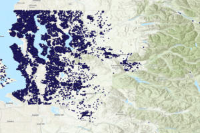

In [3]:
# the layer is already published on ArcGIS Online having item number b9e59c0473514abe8da6f395c628e4af
King_County_Feature = gis.content.get("b9e59c0473514abe8da6f395c628e4af")
King_County_Feature

In [4]:
#selecting the first item of the content named as King_County_Feature
King_County_Feature = King_County_Feature.layers[0]

### Dataframe & Definition <a id='DataFrame-&-Definition'></a>

In [5]:
# extract the spatial dataframe from the point feature layer of King County as a pandas dataframe
sdf_kc = pd.DataFrame.spatial.from_layer(King_County_Feature)

In [62]:
# visualizing the spatial dataframe on the map 
sdf_kc.spatial.plot()

In [7]:
# to check the non null count & data types of each column
sdf_kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       21613 non-null  int64   
 1   SHAPE          21613 non-null  geometry
 2   bathrooms      21613 non-null  float64 
 3   bedrooms       21613 non-null  int64   
 4   condition      21613 non-null  int64   
 5   date           21613 non-null  object  
 6   floors         21613 non-null  float64 
 7   grade          21613 non-null  int64   
 8   id             21613 non-null  int64   
 9   lat            21613 non-null  float64 
 10  long           21613 non-null  float64 
 11  price          21613 non-null  int64   
 12  sqft_above     21613 non-null  int64   
 13  sqft_basement  21613 non-null  int64   
 14  sqft_living    21613 non-null  int64   
 15  sqft_living15  21613 non-null  int64   
 16  sqft_lot       21613 non-null  int64   
 17  sqft_lot15     21613 non-null  

In [8]:
# checking the 5 heads & 5 tails value of the dataframe
sdf_kc

OBJECTID                                              SHAPE  bathrooms  \
0             1  {"x": -122.25699999999995, "y": 47.51120000000...       1.00   
1             2  {"x": -122.31899999999996, "y": 47.72100000000...       2.25   
2             3  {"x": -122.23299999999995, "y": 47.73790000000...       1.00   
3             4  {"x": -122.39299999999997, "y": 47.52080000000...       3.00   
4             5  {"x": -122.04499999999996, "y": 47.61680000000...       2.00   
...         ...                                                ...        ...   
21608     21609  {"x": -122.34599999999995, "y": 47.69930000000...       2.50   
21609     21610  {"x": -122.36199999999997, "y": 47.51070000000...       2.50   
21610     21611  {"x": -122.29899999999998, "y": 47.59440000000...       0.75   
21611     21612  {"x": -122.06899999999996, "y": 47.53450000000...       2.50   
21612     21613  {"x": -122.29899999999998, "y": 47.59410000000...       0.75   

       bedrooms  condition             date  floors  grade          id  \
0             3          3  20141013T000000     1.0      7  7129300520   
1             3          3  20141209T000000     2.0      7  6414100192   
2             2          3  20150225T000000     1.0      6  5631500400   
3             4          5  20141209T000000     1.0      7  2487200875   
4             3          3  20150218T000000     1.0      8  1954400510   
...         ...        ...              ...     ...    ...         ...   
21608         3          3  20140521T000000     3.0      8   263000018   
21609         4          3  20150223T000000     2.0      8  6600060120   
21610         2          3  20140623T000000     2.0      7  1523300141   
21611         3          3  20150116T000000     2.0      8   291310100   
21612         2          3  20141015T000000     2.0      7  1523300157   

           lat  ...  sqft_basement  sqft_living  sqft_living15  sqft_lot  \
0      47.5112  ...              0         1180           1340      5650   
1      47.7210  ...            400         2570           1690      7242   
2      47.7379  ...              0          770           2720     10000   
3      47.5208  ...            910         1960           1360      5000   
4      47.6168  ...              0         1680           1800      8080   
...        ...  ...            ...          ...            ...       ...   
21608  47.6993  ...              0         1530           1530      1131   
21609  47.5107  ...              0         2310           1830      5813   
21610  47.5944  ...              0         1020           1020      1350   
21611  47.5345  ...              0         1600           1410      2388   
21612  47.5941  ...              0         1020           1020      1076   

       sqft_lot15  view_  waterfront  yr_built  yr_renovated  zipcode  
0            5650      0           0      1955             0    98178  
1            7639      0           0      1951          1991    98125  
2            8062      0           0      1933             0    98028  
3            5000      0           0      1965             0    98136  
4            7503      0           0      1987             0    98074  
...           ...    ...         ...       ...           ...      ...  
21608        1509      0           0      2009             0    98103  
21609        7200      0           0      2014             0    98146  
21610        2007      0           0      2009             0    98144  
21611        1287      0           0      2004             0    98027  
21612        1357      0           0      2008             0    98144  

[21613 rows x 23 columns]

*The dataframe table has 20 fields describing the houses and sale prices.Apart from ObjectID & Shape*
<table align="left" border="1" >
<thead>
<tr><th align="left">Field name
</th><th align="left">Field description</th></tr>

<tbody align= "left">
<tr><td align= "left">date</td><td>Date of sale</td></tr>
<tr><td>price</td><td>Final transaction amount</td></tr>
<tr><td>bedrooms</td><td>Number of bedrooms</td></tr>
<tr><td>bathrooms</td><td>Number of bathrooms</td></tr>
<tr><td>sqft_living</td><td>Living space size (in square feet)</td></tr>
<tr><td>sqft_lot</td><td>Lot size (in square feet)</td></tr>
<tr><td>floors</td><td>Number of floors</td></tr>
<tr><td>waterfront</td><td>Is house on waterfront (1: yes, 0: not)</td></tr>
<tr><td>view</td><td>Categorical variable for view of the house</td></tr>
<tr><td>condition</td><td>Categorical variable for condition of the house</td></tr>
<tr><td>grade</td><td>Overall house grade based on King County grading system</td></tr>
<tr><td>sqft_above</td><td>Size of the house excluding basement (in square feet)</td></tr>
<tr><td>sqft_basement</td><td>Size of the basement (in square feet)</td></tr>
<tr><td>yr_built</td><td>Year house was built</td></tr>
<tr><td>yr_renovated</td><td>Year house was renovated (if renovated)</td></tr>
<tr><td>zipcode</td><td>ZIP Code of the house</td></tr>
 <tr><td>lat</td><td>Latitude of house</td></tr>
<tr><td>long</td><td>Longitude of house</td></tr>
<tr><td>sqft_living15</td><td>Size of living space in 2015 (in square feet)</td></tr>
<tr><td>sqrt_lot15</td><td>Size of lot in 2015 (in square feet)</td></tr>

*Some of the fields contain codes for specific values. These are explained below.*
<table align="left">
<thead>
<tr><th>Condition
</th><th>Condition
</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td>1</td><td>Poor</td><td>

Many repairs needed. House is showing serious deterioration.</td></tr>
<tr><td>2</td><td>Fair</td><td>

Some repairs needed immediately. Much deferred maintenance is needed.</td></tr>
<tr><td>3</td><td>Average</td><td>

Depending upon age of improvement, normal amount of upkeep for the age of the home.</td></tr>
<tr><td>4</td><td>Good</td><td>

Condition above the norm for the age of the home. This indicates extra attention and care has been taken to maintain it.</td></tr>
<tr><td>5</td><td>Very Good</td><td>

Excellent maintenance and updating on home; not a total renovation.</td></tr>
</tbody>
</table>

<table align="left">
<thead>
<tr><th>Grade
</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td>1-3</td><td>
    Falls short of minimum building standards; normally cabin or inferior structure.</td></tr>
<tr ><td>4</td><td>Generally older low quality construction. The house does not meet code.</td></tr>
<tr><td>5</td><td>Lower construction costs and workmanship. The house has small, simple design.</td></tr>
<tr><td>6</td><td>Lowest grade currently meeting building codes. Low-quality materials and simple designs were used.</td></tr>
<tr><td>7</td><td>Average grade of construction and design. This is commonly seen in plats and older subdivisions.</td></tr>
<tr><td>8</td><td>Just above average in construction and design. Houses of this quality usually have better materials in both the exterior and interior finishes.</td></tr>
<tr><td>9</td><td>Better architectural design, with extra exterior and interior design and quality.</td></tr>
<tr><td>10</td><td>Homes of this quality generally have high-quality features. Finish work is better, and more design quality is seen in the floor plans and larger square footage.</td></tr>
<tr><td>11</td><td>Custom design and higher quality finish work, with added amenities of solid woods, bathroom fixtures, and more luxurious options.</td></tr>
<tr><td>12</td><td>Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.</td></tr>
<tr><td>13</td><td>Generally custom designed and built, approaching the mansion level. These houses have a large amount of highest quality cabinet work, wood trim, and marble with large entries.</td></tr>
</tbody>
</table>


<table align="left">
<thead>
<tr><th>View
</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td>0</td><td>Unknown</td></tr>
<tr><td>1</td><td>Fair</td></tr>
<tr><td>2</td><td>Average</td></tr>
<tr><td>3</td><td>Good</td></tr>
<tr><td>4</td><td>Excellent</td></tr>
</tbody>
</table>

### Exploring and Visualizing dataset Using Seaborn plots <a id='Visualizing-dataset'></a>

In [9]:
# Visualizing the points on map using the layer file
map1 = gis.map("King County")
map1.add_layer(King_County_Feature)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [10]:
# Dropping the columns such as date,id ,lat,long & OBJECTID to visualize the exploratory variables
sdf_kc_viz = sdf_kc.drop(columns=["OBJECTID", "SHAPE", "id", "date", "lat", "long"])

In [11]:
# looking into to dataframe with 5 heads & 5 tails value after dropping the columns
sdf_kc_viz

bathrooms  bedrooms  condition  floors  grade   price  sqft_above  \
0           1.00         3          3     1.0      7  221900        1180   
1           2.25         3          3     2.0      7  538000        2170   
2           1.00         2          3     1.0      6  180000         770   
3           3.00         4          5     1.0      7  604000        1050   
4           2.00         3          3     1.0      8  510000        1680   
...          ...       ...        ...     ...    ...     ...         ...   
21608       2.50         3          3     3.0      8  360000        1530   
21609       2.50         4          3     2.0      8  400000        2310   
21610       0.75         2          3     2.0      7  402101        1020   
21611       2.50         3          3     2.0      8  400000        1600   
21612       0.75         2          3     2.0      7  325000        1020   

       sqft_basement  sqft_living  sqft_living15  sqft_lot  sqft_lot15  view_  \
0                  0         1180           1340      5650        5650      0   
1                400         2570           1690      7242        7639      0   
2                  0          770           2720     10000        8062      0   
3                910         1960           1360      5000        5000      0   
4                  0         1680           1800      8080        7503      0   
...              ...          ...            ...       ...         ...    ...   
21608              0         1530           1530      1131        1509      0   
21609              0         2310           1830      5813        7200      0   
21610              0         1020           1020      1350        2007      0   
21611              0         1600           1410      2388        1287      0   
21612              0         1020           1020      1076        1357      0   

       waterfront  yr_built  yr_renovated  zipcode  
0               0      1955             0    98178  
1               0      1951          1991    98125  
2               0      1933             0    98028  
3               0      1965             0    98136  
4               0      1987             0    98074  
...           ...       ...           ...      ...  
21608           0      2009             0    98103  
21609           0      2014             0    98146  
21610           0      2009             0    98144  
21611           0      2004             0    98027  
21612           0      2008             0    98144  

[21613 rows x 17 columns]

In [12]:
# checking if there is any NAN or null value in the dataframe
sdf_kc_viz.isnull().sum()

bathrooms        0
bedrooms         0
condition        0
floors           0
grade            0
price            0
sqft_above       0
sqft_basement    0
sqft_living      0
sqft_living15    0
sqft_lot         0
sqft_lot15       0
view_            0
waterfront       0
yr_built         0
yr_renovated     0
zipcode          0
dtype: int64

In [13]:
#let's describe the dataset for each features ranges & value
sdf_kc_viz.describe()

bathrooms      bedrooms     condition        floors         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       2.114757      3.370842      3.409430      1.494309      7.656873   
std        0.770163      0.930062      0.650743      0.539989      1.175459   
min        0.000000      0.000000      1.000000      1.000000      1.000000   
25%        1.750000      3.000000      3.000000      1.000000      7.000000   
50%        2.250000      3.000000      3.000000      1.500000      7.000000   
75%        2.500000      4.000000      4.000000      2.000000      8.000000   
max        8.000000     33.000000      5.000000      3.500000     13.000000   

              price    sqft_above  sqft_basement   sqft_living  sqft_living15  \
count  2.161300e+04  21613.000000   21613.000000  21613.000000   21613.000000   
mean   5.400881e+05   1788.390691     291.509045   2079.899736    1986.552492   
std    3.671272e+05    828.090978     442.575043    918.440897     685.391304   
min    7.500000e+04    290.000000       0.000000    290.000000     399.000000   
25%    3.219500e+05   1190.000000       0.000000   1427.000000    1490.000000   
50%    4.500000e+05   1560.000000       0.000000   1910.000000    1840.000000   
75%    6.450000e+05   2210.000000     560.000000   2550.000000    2360.000000   
max    7.700000e+06   9410.000000    4820.000000  13540.000000    6210.000000   

           sqft_lot     sqft_lot15         view_    waterfront      yr_built  \
count  2.161300e+04   21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04   12768.455652      0.234303      0.007542   1971.005136   
std    4.142051e+04   27304.179631      0.766318      0.086517     29.373411   
min    5.200000e+02     651.000000      0.000000      0.000000   1900.000000   
25%    5.040000e+03    5100.000000      0.000000      0.000000   1951.000000   
50%    7.618000e+03    7620.000000      0.000000      0.000000   1975.000000   
75%    1.068800e+04   10083.000000      0.000000      0.000000   1997.000000   
max    1.651359e+06  871200.000000      4.000000      1.000000   2015.000000   

       yr_renovated       zipcode  
count  21613.000000  21613.000000  
mean      84.402258  98077.939805  
std      401.679240     53.505026  
min        0.000000  98001.000000  
25%        0.000000  98033.000000  
50%        0.000000  98065.000000  
75%        0.000000  98118.000000  
max     2015.000000  98199.000000

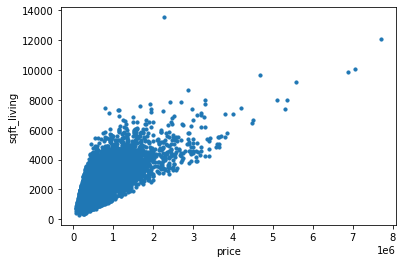

In [14]:
# scatterplot between price vs sqft_living.
sdf_kc_viz.plot.scatter(x="price", y="sqft_living", s=10);

It shows a postive relationship among the price and sqft_living i.e. higher the value of sqft_living higher will be the price

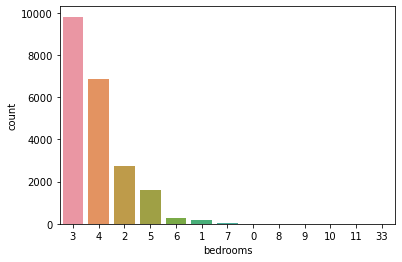

In [15]:
#countplot is plotted for the bedrooms to analyze the bedrooms capacity 
varibale = sdf_kc_viz['bedrooms'].value_counts().index
a = sdf_kc_viz.bedrooms
sns.countplot(x = sdf_kc_viz.bedrooms,order=varibale);

We can see from above graph that 3 bedrooms houses are highest in number. 

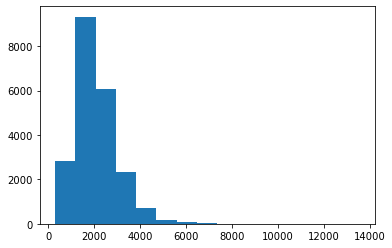

In [16]:
#A histogram is plotted for sqft living
plt.hist('sqft_living',data=sdf_kc_viz,bins=15);

The first array above the graph shows the bin count.Second arrays shows the bin range.
Through the above plot we can see 9332 rows is having range between sqft_living 1173 - 2056.66 sqft.The 9,332 training sample among the 21,613 comes to be approximately 43% of houses are having range of 1173 - 2056.66 sqft i.e. rightly skweed.

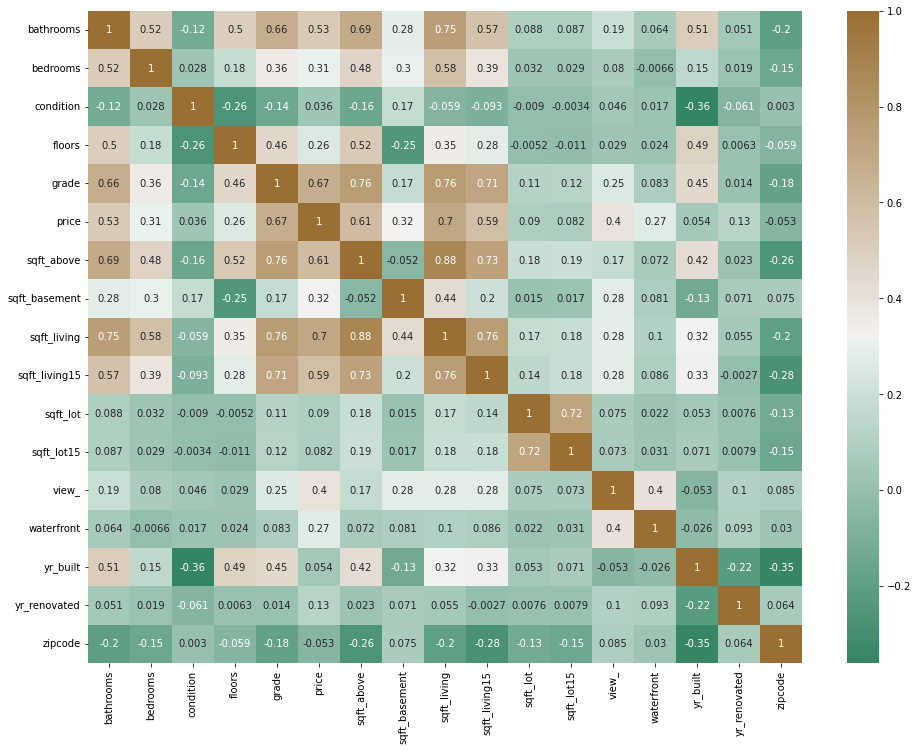

In [17]:
#heatmap plotting 
fig,ax=plt.subplots(figsize=(16,12))
colormap=sns.diverging_palette(150,50,80,as_cmap=True)
sns.heatmap(sdf_kc_viz.corr(),annot=True,cmap=colormap);

Pearson correlation coefficient (Pearson's r) quantifies the strength of the linear relationship between variables, or how much influence one variable has on another. An absolute value of Pearson's r close to one indicates a strong positive linear relationship, whereas values close to zero indicate a weak linear relationship.For example from above graph we can see the value is 0.7 for price and sqft_living.i.e. highly related.

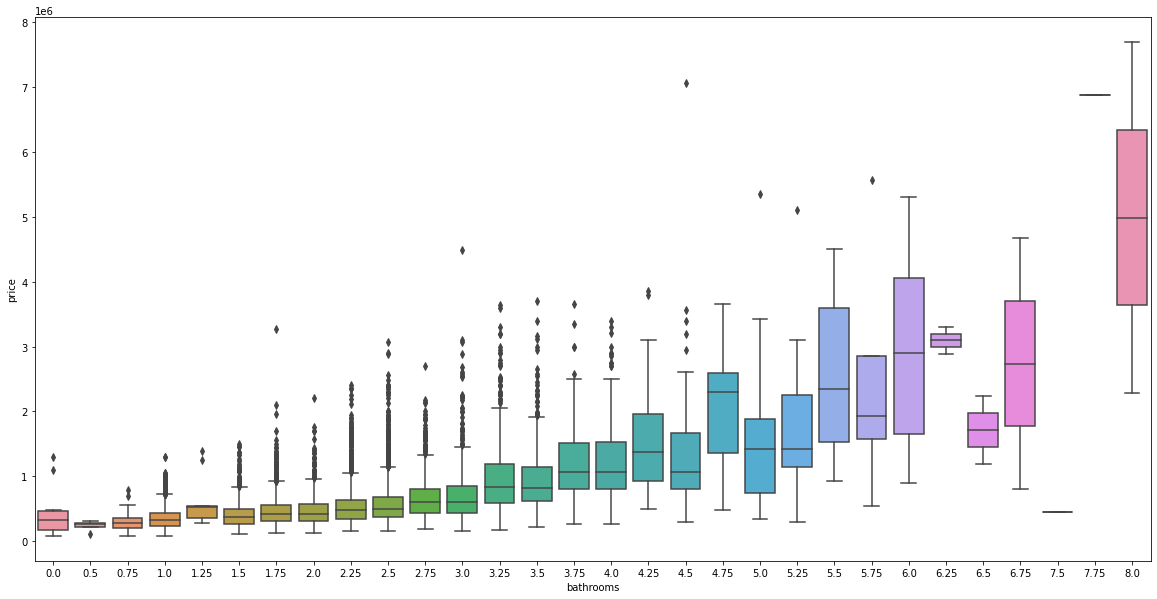

In [18]:
#boxplots
fig,ax=plt.subplots(1,1,figsize=(20,10))
sns.boxplot(x=sdf_kc_viz['bathrooms'],y=sdf_kc_viz['price']);

From the above graph we can see that there is increasing trend in prices for bathrooms.Medain price for bathrooms 0 to 3.5 bathrooms lies below 1000000 and for most the casesmedian lies below 200000 i.e. houses are available for in all the segments of bathrooms below the value 200000.
              
Longer interquartilerange is available ofr 5.5,6,or 8 size bathrooms depicts that more options in valautions are available for these properties.Most of the individual data in bathrooms are balanced or have a postively skewed.

Also,there are many outliers which indicated the variability in price ,shows the importance other features and requirement of a robust model to make predicitions.Similary all the above findings can be tried for floors,grade,bedrooms,etc.

### Model Building using AutoML on King County housing dataset <a id='Model-building'></a>

These are features which are to be used for prediction of the housing price. Zipcode is considered as categorical variable

In [19]:
X = [
    "bathrooms",
    "bedrooms",
    "condition",
    "floors",
    "grade",
    "sqft_above",
    "sqft_basement",
    "sqft_living",
    "sqft_living15",
    "sqft_lot",
    "sqft_lot15",
    "view_",
    "waterfront",
    "yr_built",
    "yr_renovated",
    ("zipcode", True),
]

In [20]:
# we can use different preprocessing technique to scale our input data i.e. below RobustScaler() is used
preprocessors = [
    (
        "bathrooms",
        "bedrooms",
        "condition",
        "floors",
        "grade",
        "sqft_above",
        "sqft_basement",
        "sqft_living",
        "sqft_living15",
        "sqft_lot",
        "sqft_lot15",
        "view_",
        "waterfront",
        "yr_built",
        "yr_renovated",
        "zipcode",
        RobustScaler(),
    )
]

In [21]:
#splitting the dataset into train-test in ratio of 90%-10%.
X_train,X_test = train_test_split(sdf_kc, test_size=0.10,random_state=32, shuffle=True)

In [22]:
data = prepare_tabulardata(
    X_train, "price", explanatory_variables=X, preprocessors=preprocessors
)

C:\Users\sum11525\.conda\envs\pyfeb38\lib\site-packages\arcgis\learn\_utils\tabular_data.py:1034: UserWarning: Column zipcode has more than 20 unique value. Sure this is categorical?
  warnings.warn(


In [23]:
AutoML_class_obj = AutoML(data=data,eval_metric = "r2",n_jobs=-1)
AutoML_class_obj.fit()

Linear algorithm was disabled.
AutoML directory: AutoML_25
The task is regression with evaluation metric r2
AutoML will use algorithms: ['Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 1 model
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
1_DecisionTree r2 0.564426 trained in 26.43 seconds
* Step default_algorithms will try to check up to 5 models
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
2_Default_LightGBM r2 0.860768 trained in 23.95 seconds


C:\Users\sum11525\.conda\envs\pyfeb38\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

C:\Users\sum11525\.conda\envs\pyfeb38\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
3_Default_Xgboost r2 0.867912 trained in 23.08 seconds
4_Default_NeuralNetwork r2 0.755303 trained in 2.27 seconds
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
5_Default_RandomForest r2 0.682441 trained in 2.52 seconds
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
6_Default_ExtraTrees r2 0.654105 trained in 3.34 seconds
* Step ensemble will try to check up to 1 model
Ensemble r2 0.87152 trained in 0.21 seconds
AutoML fit time: 100.57 seconds
AutoML best model: Ensemble
All the evaluated models are saved in the

After creating the AutoML object by passing the data obtained from prepare_tabulardata and using default values for other parameters, now we proceed to train the model using AutoML. This is done by calling the fit method as shown below. New folder will be created and all the models and their variants are saved in that folder.



In [24]:
AutoML_class_obj = AutoML(data=data,eval_metric = "r2",n_jobs=-1)
AutoML_class_obj.fit()

Linear algorithm was disabled.
AutoML directory: AutoML_26
The task is regression with evaluation metric r2
AutoML will use algorithms: ['Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 1 model
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
1_DecisionTree r2 0.564426 trained in 6.54 seconds
* Step default_algorithms will try to check up to 5 models
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
2_Default_LightGBM r2 0.860768 trained in 6.47 seconds


C:\Users\sum11525\.conda\envs\pyfeb38\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

C:\Users\sum11525\.conda\envs\pyfeb38\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
3_Default_Xgboost r2 0.867912 trained in 9.0 seconds
4_Default_NeuralNetwork r2 0.755303 trained in 2.24 seconds
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
5_Default_RandomForest r2 0.682441 trained in 2.52 seconds
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
6_Default_ExtraTrees r2 0.654105 trained in 3.45 seconds
* Step ensemble will try to check up to 1 model
Ensemble r2 0.87152 trained in 0.26 seconds
AutoML fit time: 48.81 seconds
AutoML best model: Ensemble
All the evaluated models are saved in the pa

In [25]:
#training score represents the score generated from train dataset 
AutoML_class_obj.score()

C:\Users\sum11525\.conda\envs\pyfeb38\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



0.9415148753738004

In [26]:
#the r-square value for the test dataset
result1 = AutoML_class_obj.predict(X_test,prediction_type="dataframe")
print(r2_score(result1[['price']], result1[['prediction_results']]))

0.8451839287955436


C:\Users\sum11525\.conda\envs\pyfeb38\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



Further the results may be improved by using different modes like "Explain"(Default) , "Perform" and "Compete".
can be used for machine learning competitions (maximum performance).

### Enriching the point features with demographic data using GeoEnrichment service from Esri <a id='geoenrich'></a>

The feature data is now created using selected demographics information for each points. This is accomplished accessing the GeoEnrichment services from Esri, which consists the latest census data. The entire data repository is first visualized, out of which the relevant variables are finalized from a literature study. These selected variables are searched for adding in the feature set.

In [27]:
# Displaying the various data topic available for GeoEnrichment for USA in the Esri database
usa = Country.get("US")
usa_data = usa.data_collections
df_usa_data = pd.DataFrame(usa_data)
df_usa_data.head()

analysisVariable                   alias  \
dataCollectionID                                                    
1yearincrements   1yearincrements.AGE0_CY  2021 Population Age <1   
1yearincrements   1yearincrements.AGE1_CY   2021 Population Age 1   
1yearincrements   1yearincrements.AGE2_CY   2021 Population Age 2   
1yearincrements   1yearincrements.AGE3_CY   2021 Population Age 3   
1yearincrements   1yearincrements.AGE4_CY   2021 Population Age 4   

                                       fieldCategory vintage  
dataCollectionID                                              
1yearincrements   2021 Age: 1 Year Increments (Esri)    2021  
1yearincrements   2021 Age: 1 Year Increments (Esri)    2021  
1yearincrements   2021 Age: 1 Year Increments (Esri)    2021  
1yearincrements   2021 Age: 1 Year Increments (Esri)    2021  
1yearincrements   2021 Age: 1 Year Increments (Esri)    2021

In [28]:
# Filtering the unique topic under dataCollectionID
df_usa_data.reset_index(inplace=True)
list(df_usa_data.dataCollectionID.unique())

['1yearincrements',
 '5yearincrements',
 'ACS_Housing_Summary_rep',
 'ACS_Population_Summary_rep',
 'Age',
 'AgeDependency',
 'Age_50_Profile_rep',
 'Age_by_Sex_Profile_rep',
 'Age_by_Sex_by_Race_Profile_rep',
 'AtRisk',
 'AutomobilesAutomotiveProducts',
 'Automotive_Aftermarket_Expenditures_rep',
 'BabyProductsToysGames',
 'Business_Summary_rep',
 'CivicActivitiesPoliticalAffiliation',
 'ClothingShoesAccessories',
 'Community_Profile_rep',
 'DaytimePopulation',
 'Demographic_and_Income_Comparison_Profile_rep',
 'Demographic_and_Income_Profile_rep',
 'Disposable_Income_Profile_rep',
 'ElectronicsInternet',
 'Electronics_and_Internet_Market_Potential_rep',
 'EmploymentUnemployment',
 'Executive_Summary_rep',
 'Finances_Market_Potential_rep',
 'FinancialInsurance',
 'Financial_Expenditures_rep',
 'Generations',
 'Graphic_Profile_rep',
 'GroceryAlcoholicBeverages',
 'Health',
 'HealthPersonalCare',
 'HealthPersonalCareCEX',
 'Health_and_Beauty_Market_Potential_rep',
 'HistoricalHouseholds


Items can be searched using alias field, for the related analysis variable name -- here as an example a variable with 'Nonprofit' is searched. Out of the these the relevant 'Nonprofit' data is to be selected.



In [29]:
df_usa_data[df_usa_data["alias"].str.contains("Nonprofit")]

dataCollectionID          analysisVariable  \
11033    classofworker  classofworker.ACSMPRIVNP   
11034    classofworker  classofworker.MOEMPRIVNP   
11041    classofworker  classofworker.RELMPRIVNP   
11066    classofworker  classofworker.ACSFPRIVNP   
11067    classofworker  classofworker.MOEFPRIVNP   
11068    classofworker  classofworker.RELFPRIVNP   

                                                   alias  \
11033        2019 Civ Male 16+:Priv Nonprofit (ACS 5-Yr)   
11034    2019 Civ Male 16+:Priv Nonprofit MOE (ACS 5-Yr)   
11041    2019 Civ Male 16+:Priv Nonprofit REL (ACS 5-Yr)   
11066      2019 Civ Female 16+:Priv Nonprofit (ACS 5-Yr)   
11067  2019 Civ Female 16+:Priv Nonprofit MOE (ACS 5-Yr)   
11068  2019 Civ Female 16+:Priv Nonprofit REL (ACS 5-Yr)   

                         fieldCategory    vintage  
11033  2015-2019 Class of Worker (ACS)  2015-2019  
11034  2015-2019 Class of Worker (ACS)  2015-2019  
11041  2015-2019 Class of Worker (ACS)  2015-2019  
11066  2015-2019 Class of Worker (ACS)  2015-2019  
11067  2015-2019 Class of Worker (ACS)  2015-2019  
11068  2015-2019 Class of Worker (ACS)  2015-2019

Adding data using enrichment - At this stage a literature study is undertaken to narrow down the various factors that might impact the price of house in King County.

Subsequently these factors are identified from the USA GeoEnrichment database as shown above. These variable names are then compiled in a dictionary for passing them to the enrichment tool.

In [30]:
enrichment_variables = {
    "classofworker.ACSCIVEMP": "Employed Population Age 16+",
    "classofworker.ACSMCIVEMP": "Employed Male Pop Age 16+",
    "classofworker.ACSMPRIVNP": "Male 16+Priv Nonprofit",
    "classofworker.ACSMEPRIVP": "Male 16+:Priv Profit Empl",
    "classofworker.ACSMSELFI": "Male 16+:Priv Profit Self Empl",
    "classofworker.ACSMSTGOV": "Male 16+:State Govt Wrkr",
    "classofworker.ACSMFEDGOV": "Male 16+:Fed Govt Wrkr",
    "classofworker.ACSMSELFNI": "Male 16+:Self-Emp Not Inc",
    "classofworker.ACSMUNPDFM": "Male 16+:Unpaid Family Wrkr",
    "classofworker.ACSFCIVEMP": "Female Pop Age 16+",
    "classofworker.ACSFEPRIVP": "Female 16+:Priv Profit Empl",
    "classofworker.ACSFSELFI": "Female 16+:Priv Profit Self Empl",
    "classofworker.ACSFPRIVNP": "Female 16+:Priv Nonprofit",
    "classofworker.ACSFLOCGOV": "Female 16+:Local Govt Wrkr",
    "classofworker.ACSFSTGOV": "Female 16+:State Govt Wrkr",
    "classofworker.ACSFFEDGOV": "Female 16+:Fed Govt Wrkr",
    "classofworker.ACSFSELFNI": "Female 16+:Self-Emp Not Inc",
    "classofworker.ACSFUNPDFM": "Female 16+:Unpaid Family Wrkr",
    "gender.MEDAGE_CY": "2019 Median Age",
    "Generations.GENALPHACY": "2019 Generation Alpha Population",
    "Generations.GENZ_CY": "2019 Generation Z Population",
    "Generations.MILLENN_CY": "2019 Millennial Population",
    "Generations.GENX_CY": "2019 Generation X Population",
    "Generations.BABYBOOMCY": "2019 Baby Boomer Population",
    "Generations.OLDRGENSCY": "2019 Silent & Greatest Generations Population",
    "Generations.GENBASE_CY": "2019 Population by Generation Base",
    "populationtotals.POPDENS_CY": "2019 Population Density",
    "DaytimePopulation.DPOP_CY": "2019 Total Daytime Population",
    "raceandhispanicorigin.WHITE_CY": "2019 White Population",
    "raceandhispanicorigin.BLACK_CY": "2019 Black Population",
    "raceandhispanicorigin.AMERIND_CY": "2019 American Indian Population",
    "raceandhispanicorigin.ASIAN_CY": "2019 Asian Population",
    "raceandhispanicorigin.PACIFIC_CY": "2019 Pacific Islander Population",
    "raceandhispanicorigin.OTHRACE_CY": "2019 Other Race Population",
    "raceandhispanicorigin.DIVINDX_CY": "2019 Diversity Index",
    "households.ACSHHBPOV": "HHs: Inc Below Poverty Level",
    "households.ACSHHAPOV": "HHs:Inc at/Above Poverty Level",
    "households.ACSFAMHH": "ACS Family Households",
    "businesses.S01_BUS": "Total Businesses (SIC)",
    "businesses.N05_BUS": "Construction Businesses (NAICS)",
    "businesses.N08_BUS": "Retail Trade Businesses (NAICS)",
    "businesses.N21_BUS": "Transportation/Warehouse Bus (NAICS)",
    "ElectronicsInternet.MP09147a_B": "Own any tablet",
    "ElectronicsInternet.MP09148a_B": "Own any e-reader",
    "ElectronicsInternet.MP19001a_B": "Have access to Internet at home",
    "ElectronicsInternet.MP19070a_I": "Index: Spend 0.5-0.9 hrs online(excl email/IM .",
    "ElectronicsInternet.MP19071a_B": "Spend <0.5 hrs online (excl email/IM time) daily",
    "populationtotals.TOTPOP_CY": "2019 Total Population",
    "gender.MALES_CY": "2019 Male Population",
    "gender.FEMALES_CY": "2019 Female Population",
    "industry.EMP_CY": "2019 Employed Civilian Pop 16+",
    "industry.UNEMP_CY": "2019 Unemployed Population 16+",
    "industry.UNEMPRT_CY": "2019 Unemployment Rate",
    "commute.ACSWORKERS": "ACS Workers Age 16+",
    "commute.ACSDRALONE": "ACS Workers 16+: Drove Alone",
    "commute.ACSCARPOOL": "ACS Workers 16+: Carpooled",
    "commute.ACSPUBTRAN": "ACS Workers 16+: Public Transportation",
    "commute.ACSBUS": "ACS Workers 16+: Bus",
    "commute.ACSSTRTCAR": "ACS Workers 16+: Streetcar",
    "commute.ACSSUBWAY": "ACS Workers 16+: Subway",
    "commute.ACSRAILRD": "ACS Workers 16+: Railroad",
    "commute.ACSFERRY": "ACS Workers 16+: Ferryboat",
    "commute.ACSTAXICAB": "ACS Workers 16+: Taxicab",
    "commute.ACSMCYCLE": "ACS Workers 16+: Motorcycle",
    "commute.ACSBICYCLE": "ACS Workers 16+: Bicycle",
    "commute.ACSWALKED": "ACS Workers 16+: Walked",
    "commute.ACSOTHTRAN": "ACS Workers 16+: Other Means",
    "commute.ACSWRKHOME": "ACS Wrkrs 16+: Worked at Home",
    "OwnerRenter.OWNER_CY": "2019 Owner Occupied HUs",
    "OwnerRenter.RENTER_CY": "2019 Renter Occupied HUs",
    "vacant.VACANT_CY": "2019 Vacant Housing Units",
    "homevalue.MEDVAL_CY": "2019 Median Home Value",
    "housingunittotals.TOTHU_CY": "2019 Total Housing Units",
    "yearbuilt.ACSMEDYBLT": "ACS Median Year Structure Built: HUs",
    "SpendingTotal.X1001_X": "2019 Annual Budget Exp",
    "transportation.X6001_X": "2019 Transportation",
    "households.ACSTOTHH": "ACS Total Households",
    "DaytimePopulation.DPOPWRK_CY": "2019 Daytime Pop: Workers",
    "DaytimePopulation.DPOPRES_CY": "2019 Daytime Pop: Residents",
    "DaytimePopulation.DPOPDENSCY": "2019 Daytime Pop Density",
    "occupation.OCCPROT_CY": "2019 Occupation: Protective Service",
    "occupation.OCCFOOD_CY": "2019 Occupation: Food Preperation",
    "occupation.OCCPERS_CY": "2019 Occupation: Personal Care",
    "occupation.OCCADMN_CY": "2019 Occupation: Office/Admin",
    "occupation.OCCCONS_CY": "2019 Occupation: Construction/Extraction",
    "occupation.OCCPROD_CY": "2019 Occupation: Production",
}

In [31]:
# Enrichment operation using ArcGIS API for Python
enrichment_variables_df = pd.DataFrame.from_dict(
    enrichment_variables, orient="index", columns=["Variable Definition"]
)
enrichment_variables_df.reset_index(level=0, inplace=True)
enrichment_variables_df.columns = ["AnalysisVariable", "Variable Definition"]
enrichment_variables_df.head()

AnalysisVariable             Variable Definition
0   classofworker.ACSCIVEMP     Employed Population Age 16+
1  classofworker.ACSMCIVEMP       Employed Male Pop Age 16+
2  classofworker.ACSMPRIVNP          Male 16+Priv Nonprofit
3  classofworker.ACSMEPRIVP       Male 16+:Priv Profit Empl
4   classofworker.ACSMSELFI  Male 16+:Priv Profit Self Empl

In [34]:
# Convertng the variables names to list for passing them to the enrichment tool
variable_names = enrichment_variables_df["AnalysisVariable"].tolist()

# checking the firt few values of the list
variable_names[0:5]

['classofworker.ACSCIVEMP',
 'classofworker.ACSMCIVEMP',
 'classofworker.ACSMPRIVNP',
 'classofworker.ACSMEPRIVP',
 'classofworker.ACSMSELFI']

Data enriching operation . Documentation link to the <a href="https://developers.arcgis.com/python/api-reference/arcgis.features.enrich_data.html" target="_blank"> enrich_layer method </a>

In [35]:
# we are using buffer distance of 3 miles in straightline as it is point feature in our use case
from datetime import datetime
King_County_Feature_enriched = enrich_layer(
    King_County_Feature,
    buffer_type="StraightLine",
    distance=5.0,
    units="Miles",
    analysis_variables=variable_names,
    output_name="enrhcied_kc",
)

In [36]:
# Extracting the resulting enriched dataframe after the geoenrichment method
sdf_King_County_Feature_enriched = King_County_Feature_enriched.layers[0].query().sdf

In [37]:
# Visualizing the pandas dataframe columns
print(sdf_King_County_Feature_enriched.columns)

Index(['OBJECTID', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       ...
       'DPOPWRK_CY', 'DPOPRES_CY', 'DPOPDENSCY', 'OCCPROT_CY', 'OCCFOOD_CY',
       'OCCPERS_CY', 'OCCADMN_CY', 'OCCCONS_CY', 'OCCPROD_CY', 'SHAPE'],
      dtype='object', length=117)


The field name of the enriched dataframe are code words which needs to be elaborated. Hence these are renamed with their actual definition from the variable definition of the list that was first created during selection of the variables.

In [38]:
enrichment_variables_df.head()

AnalysisVariable             Variable Definition
0   classofworker.ACSCIVEMP     Employed Population Age 16+
1  classofworker.ACSMCIVEMP       Employed Male Pop Age 16+
2  classofworker.ACSMPRIVNP          Male 16+Priv Nonprofit
3  classofworker.ACSMEPRIVP       Male 16+:Priv Profit Empl
4   classofworker.ACSMSELFI  Male 16+:Priv Profit Self Empl

In [39]:
enrichment_variables_copy = enrichment_variables_df.copy()
enrichment_variables_copy.head(2)

AnalysisVariable          Variable Definition
0   classofworker.ACSCIVEMP  Employed Population Age 16+
1  classofworker.ACSMCIVEMP    Employed Male Pop Age 16+

In [40]:
enrichment_variables_copy["AnalysisVariable"] = enrichment_variables_copy.AnalysisVariable.str.split(pat=".", expand=True)[1]
enrichment_variables_copy


AnalysisVariable                       Variable Definition
0         ACSCIVEMP               Employed Population Age 16+
1        ACSMCIVEMP                 Employed Male Pop Age 16+
2        ACSMPRIVNP                    Male 16+Priv Nonprofit
3        ACSMEPRIVP                 Male 16+:Priv Profit Empl
4         ACSMSELFI            Male 16+:Priv Profit Self Empl
..              ...                                       ...
81       OCCFOOD_CY         2019 Occupation: Food Preperation
82       OCCPERS_CY            2019 Occupation: Personal Care
83       OCCADMN_CY             2019 Occupation: Office/Admin
84       OCCCONS_CY  2019 Occupation: Construction/Extraction
85       OCCPROD_CY               2019 Occupation: Production

[86 rows x 2 columns]

In [41]:
enrichment_variables_copy.set_index("AnalysisVariable", drop=True, inplace=True)
dictionary = enrichment_variables_copy.to_dict()
new_columns = dictionary["Variable Definition"]

In [42]:
# setting the columns to greater value i.e 150 as to get all the columns of the data frame
pd.set_option("display.max_columns", 150)

# Field renamed and new dataframe visualized
sdf_King_County_Feature_enriched.rename(columns=new_columns, inplace=True)
sdf_King_County_Feature_enriched.head()

OBJECTID          id             date   price  bedrooms  bathrooms  \
0         1  7129300520  20141013T000000  221900         3       1.00   
1         2  6414100192  20141209T000000  538000         3       2.25   
2         3  5631500400  20150225T000000  180000         2       1.00   
3         4  2487200875  20141209T000000  604000         4       3.00   
4         5  1954400510  20150218T000000  510000         3       2.00   

   sqft_living  sqft_lot  floors  waterfront  view_  condition  grade  \
0         1180      5650     1.0           0      0          3      7   
1         2570      7242     2.0           0      0          3      7   
2          770     10000     1.0           0      0          3      6   
3         1960      5000     1.0           0      0          5      7   
4         1680      8080     1.0           0      0          3      8   

   sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0        1180              0      1955             0    98178  47.5112   
1        2170            400      1951          1991    98125  47.7210   
2         770              0      1933             0    98028  47.7379   
3        1050            910      1965             0    98136  47.5208   
4        1680              0      1987             0    98074  47.6168   

      long  sqft_living15  sqft_lot15 ID_1 sourceCountry  ENRICH_FID  \
0 -122.257           1340        5650    0            US           1   
1 -122.319           1690        7639    1            US           2   
2 -122.233           2720        8062    2            US           3   
3 -122.393           1360        5000    3            US           4   
4 -122.045           1800        7503    4            US           5   

     areaType bufferUnits bufferUnitsAlias  bufferRadii  \
0  RingBuffer   esriMiles            Miles            5   
1  RingBuffer   esriMiles            Miles            5   
2  RingBuffer   esriMiles            Miles            5   
3  RingBuffer   esriMiles            Miles            5   
4  RingBuffer   esriMiles            Miles            5   

                                   aggregationMethod  \
0  BlockApportionment:US.BlockGroups;PointsLayer:...   
1  BlockApportionment:US.BlockGroups;PointsLayer:...   
2  BlockApportionment:US.BlockGroups;PointsLayer:...   
3  BlockApportionment:US.BlockGroups;PointsLayer:...   
4  BlockApportionment:US.BlockGroups;PointsLayer:...   

   populationToPolygonSizeRating  apportionmentConfidence  HasData  \
0                          2.191                    2.576        1   
1                          2.191                    2.576        1   
2                          2.191                    2.576        1   
3                          2.191                    2.576        1   
4                          2.191                    2.576        1   

   Employed Population Age 16+  Employed Male Pop Age 16+  \
0                       162574                      87713   
1                       246945                     128931   
2                       166477                      89851   
3                       100426                      52589   
4                        82415                      49043   

   Male 16+Priv Nonprofit  Male 16+:Priv Profit Empl  \
0                    5792                      63708   
1                    9727                      90076   
2                    5482                      66416   
3                    3482                      37127   
4                    2001                      40348   

   Male 16+:Priv Profit Self Empl  Male 16+:State Govt Wrkr  \
0                            3431                      2469   
1                            5682                      7840   
2                            4007                      3916   
3                            2988                      1542   
4                            2416                       844   

   Male 16+:Fed Govt Wrkr  Male 16+:Self-Emp Not In

The renamed data frame above is now self-explanatory hence more interpretable.

### Model Building using AutoML on Enriched data <a id='Model-Building-using-AutoML-on-Enrich-data'></a>

Now we will perform similar steps as used earlier to fit the Enriched dataset into AutoML to get a better output.

In [43]:
X = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "waterfront",
    "view_",
    "condition",
    "grade",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "yr_renovated",
    ("zipcode", True),
    "sqft_living15",
    "sqft_lot15",
    "Employed Population Age 16+",
    "Employed Male Pop Age 16+",
    "Male 16+Priv Nonprofit",
    "Male 16+:Priv Profit Empl",
    "Male 16+:Priv Profit Self Empl",
    "Male 16+:State Govt Wrkr",
    "Male 16+:Fed Govt Wrkr",
    "Male 16+:Self-Emp Not Inc",
    "Male 16+:Unpaid Family Wrkr",
    "Female Pop Age 16+",
    "Female 16+:Priv Profit Empl",
    "Female 16+:Priv Profit Self Empl",
    "Female 16+:Priv Nonprofit",
    "Female 16+:Local Govt Wrkr",
    "Female 16+:State Govt Wrkr",
    "Female 16+:Fed Govt Wrkr",
    "Female 16+:Self-Emp Not Inc",
    "Female 16+:Unpaid Family Wrkr",
    "2019 Median Age",
    "2019 Generation Alpha Population",
    "2019 Generation Z Population",
    "2019 Millennial Population",
    "2019 Generation X Population",
    "2019 Baby Boomer Population",
    "2019 Silent & Greatest Generations Population",
    "2019 Population by Generation Base",
    "2019 Population Density",
    "2019 Total Daytime Population",
    "2019 White Population",
    "2019 Black Population",
    "2019 American Indian Population",
    "2019 Asian Population",
    "2019 Pacific Islander Population",
    "2019 Other Race Population",
    "2019 Diversity Index",
    "HHs: Inc Below Poverty Level",
    "HHs:Inc at/Above Poverty Level",
    "Total Businesses (SIC)",
    "Construction Businesses (NAICS)",
    "Retail Trade Businesses (NAICS)",
    "Transportation/Warehouse Bus (NAICS)",
    "Own any tablet",
    "Own any e-reader",
    "Have access to Internet at home",
    "Index: Spend 0.5-0.9 hrs online(excl email/IM .",
    "Spend <0.5 hrs online (excl email/IM time) daily",
    "2019 Total Population",
    "2019 Male Population",
    "2019 Female Population",
    "2019 Employed Civilian Pop 16+",
    "2019 Unemployed Population 16+",
    "2019 Unemployment Rate",
    "ACS Workers Age 16+",
    "ACS Workers 16+: Drove Alone",
    "ACS Workers 16+: Carpooled",
    "ACS Workers 16+: Public Transportation",
    "ACS Workers 16+: Bus",
    "ACS Workers 16+: Streetcar",
    "ACS Workers 16+: Subway",
    "ACS Workers 16+: Ferryboat",
    "ACS Workers 16+: Taxicab",
    "ACS Workers 16+: Motorcycle",
    "ACS Workers 16+: Bicycle",
    "ACS Workers 16+: Walked",
    "ACS Workers 16+: Other Means",
    "ACS Wrkrs 16+: Worked at Home",
    "2019 Owner Occupied HUs",
    "2019 Renter Occupied HUs",
    "2019 Vacant Housing Units",
    "2019 Median Home Value",
    "2019 Total Housing Units",
    "ACS Median Year Structure Built: HUs",
    "2019 Annual Budget Exp",
    "2019 Transportation",
    "2019 Daytime Pop: Workers",
    "2019 Daytime Pop: Residents",
    "2019 Daytime Pop Density",
    "2019 Occupation: Protective Service",
    "2019 Occupation: Food Preperation",
    "2019 Occupation: Personal Care",
    "2019 Occupation: Office/Admin",
    "2019 Occupation: Construction/Extraction",
    "2019 Occupation: Production",
]


In [44]:
preprocessors = [
    (
        "bedrooms",
        "bathrooms",
        "sqft_living",
        "sqft_lot",
        "floors",
        "waterfront",
        "view_",
        "condition",
        "grade",
        "sqft_above",
        "sqft_basement",
        "yr_built",
        "yr_renovated",
        "zipcode",
        "sqft_living15",
        "sqft_lot15",
        "Employed Population Age 16+",
        "Employed Male Pop Age 16+",
        "Male 16+Priv Nonprofit",
        "Male 16+:Priv Profit Empl",
        "Male 16+:Priv Profit Self Empl",
        "Male 16+:State Govt Wrkr",
        "Male 16+:Fed Govt Wrkr",
        "Male 16+:Self-Emp Not Inc",
        "Male 16+:Unpaid Family Wrkr",
        "Female Pop Age 16+",
        "Female 16+:Priv Profit Empl",
        "Female 16+:Priv Profit Self Empl",
        "Female 16+:Priv Nonprofit",
        "Female 16+:Local Govt Wrkr",
        "Female 16+:State Govt Wrkr",
        "Female 16+:Fed Govt Wrkr",
        "Female 16+:Self-Emp Not Inc",
        "Female 16+:Unpaid Family Wrkr",
        "2019 Median Age",
        "2019 Generation Alpha Population",
        "2019 Generation Z Population",
        "2019 Millennial Population",
        "2019 Generation X Population",
        "2019 Baby Boomer Population",
        "2019 Silent & Greatest Generations Population",
        "2019 Population by Generation Base",
        "2019 Population Density",
        "2019 Total Daytime Population",
        "2019 White Population",
        "2019 Black Population",
        "2019 American Indian Population",
        "2019 Asian Population",
        "2019 Pacific Islander Population",
        "2019 Other Race Population",
        "2019 Diversity Index",
        "HHs: Inc Below Poverty Level",
        "HHs:Inc at/Above Poverty Level",
        "Total Businesses (SIC)",
        "Construction Businesses (NAICS)",
        "Retail Trade Businesses (NAICS)",
        "Transportation/Warehouse Bus (NAICS)",
        "Own any tablet",
        "Own any e-reader",
        "Have access to Internet at home",
        "Index: Spend 0.5-0.9 hrs online(excl email/IM .",
        "Spend <0.5 hrs online (excl email/IM time) daily",
        "2019 Total Population",
        "2019 Male Population",
        "2019 Female Population",
        "2019 Employed Civilian Pop 16+",
        "2019 Unemployed Population 16+",
        "2019 Unemployment Rate",
        "ACS Workers Age 16+",
        "ACS Workers 16+: Drove Alone",
        "ACS Workers 16+: Carpooled",
        "ACS Workers 16+: Public Transportation",
        "ACS Workers 16+: Bus",
        "ACS Workers 16+: Streetcar",
        "ACS Workers 16+: Subway",
        "ACS Workers 16+: Ferryboat",
        "ACS Workers 16+: Taxicab",
        "ACS Workers 16+: Motorcycle",
        "ACS Workers 16+: Bicycle",
        "ACS Workers 16+: Walked",
        "ACS Workers 16+: Other Means",
        "ACS Wrkrs 16+: Worked at Home",
        "2019 Owner Occupied HUs",
        "2019 Renter Occupied HUs",
        "2019 Vacant Housing Units",
        "2019 Median Home Value",
        "2019 Total Housing Units",
        "ACS Median Year Structure Built: HUs",
        "2019 Annual Budget Exp",
        "2019 Transportation",
        "2019 Daytime Pop: Workers",
        "2019 Daytime Pop: Residents",
        "2019 Daytime Pop Density",
        "2019 Occupation: Protective Service",
        "2019 Occupation: Food Preperation",
        "2019 Occupation: Personal Care",
        "2019 Occupation: Office/Admin",
        "2019 Occupation: Construction/Extraction",
        "2019 Occupation: Production",
        RobustScaler(),
    )
]


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(sdf_King_County_Feature_enriched, test_size=0.1,random_state=32, shuffle=True)

In [46]:
data = prepare_tabulardata(X_train,
                           'price',
                           explanatory_variables=X,                           
                           preprocessors=preprocessors)

C:\Users\sum11525\.conda\envs\pyfeb38\lib\site-packages\arcgis\learn\_utils\tabular_data.py:1034: UserWarning:

Column zipcode has more than 20 unique value. Sure this is categorical?



In [47]:
AutoML_class_obj2 = AutoML(data=data,eval_metric = "r2")
AutoML_class_obj2.fit()

Linear algorithm was disabled.
AutoML directory: AutoML_27
The task is regression with evaluation metric r2
AutoML will use algorithms: ['Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 1 model
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
1_DecisionTree r2 0.627548 trained in 46.03 seconds
* Step default_algorithms will try to check up to 5 models
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
2_Default_LightGBM r2 0.907316 trained in 16.0 seconds


C:\Users\sum11525\.conda\envs\pyfeb38\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

C:\Users\sum11525\.conda\envs\pyfeb38\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Continuing ...
3_Default_Xgboost r2 0.905928 trained in 25.86 seconds
4_Default_NeuralNetwork r2 0.898258 trained in 5.16 seconds
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
5_Default_RandomForest r2 0.784828 trained in 6.6 seconds
Exception while producing SHAP explanations. Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.
Continuing ...
6_Default_ExtraTrees r2 0.774306 trained in 6.54 seconds
* Step ensemble will try to check up to 1 model
Ensemble r2 0.91694 trained in 0.21 seconds
AutoML fit time: 143.53 seconds
AutoML best model: Ensemble
All the evaluated models are saved in the path  D:\Github\arcgis-python-api\samples\04_gis_analysts_data_scientist

In [48]:
#Training score r-square value 
AutoML_class_obj2.score()

C:\Users\sum11525\.conda\envs\pyfeb38\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



0.959940955753209

In [49]:
#test dataset r-square value 
result1 = AutoML_class_obj2.predict(X_test,prediction_type="dataframe")
r2_score(result1[['price']], result1[['prediction_results']])

C:\Users\sum11525\.conda\envs\pyfeb38\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



0.9020238382623098

AutoML_class_obj2.save('< Pass the path >') can be used to save the model at desried path

### Result Visualization <a id='Result-Visualization'></a>

In [50]:
# report regarding the model generated
AutoML_class_obj2.report()

C:\Users\sum11525\.conda\envs\pyfeb38\lib\site-packages\arcgis\learn\models\_auto_ml.py:287: UserWarning:

In case the report html is not rendered appropriately in the notebook, the same can be found in the path AutoML_27\README.html



In [51]:
#the visualize the result
AutoML_class_obj2.show_results()

2019 American Indian Population  2019 Annual Budget Exp  \
3491                              3295             15097379405   
16606                             3689             35546823436   
18896                             3499             31998109446   
18987                             2931             11987175299   
19914                             3189             17042930607   

       2019 Asian Population  2019 Baby Boomer Population  \
3491                   98386                        73365   
16606                  89792                       101398   
18896                  78312                        87766   
18987                  92584                        65761   
19914                  71709                        60634   

       2019 Black Population  2019 Daytime Pop Density  \
3491                   56399                    5035.4   
16606                  34023                    8545.7   
18896                  32568                    8047.9   
18987                  51020                    4085.4   
19914                  38763                    5487.4   

       2019 Daytime Pop: Residents  2019 Daytime Pop: Workers  \
3491                        168270                     227148   
16606                       217899                     453177   
18896                       186213                     445772   
18987                       154533                     166285   
19914                       127677                     303239   

       2019 Diversity Index  2019 Employed Civilian Pop 16+  \
3491                   77.7                          192142   
16606                  56.0                          345205   
18896                  56.5                          312554   
18987                  79.9                          169378   
19914                  71.9                          186723   

       2019 Female Population  2019 Generation Alpha Population  \
3491                   180366                             20072   
16606                  279927                             22165   
18896                  246100                             18867   
18987                  162318                             19610   
19914                  154822                             13915   

       2019 Generation X Population  2019 Generation Z Population  \
3491                          77395                         75002   
16606                        112252                        104339   
18896                        100684                         91365   
18987                         69016                         69630   
19914                         66944                         51920   

       2019 Male Population  2019 Median Age  2019 Median Home Value  \
3491                 180203             39.4                  624378   
16606                283766             37.0                  819401   
18896                253678             36.8                  827917   
18987                159982             39.2                  570414   
19914                160360             38.8                  656783   

       2019 Millennial Population  2019 Occupation: Construction/Extraction  \
3491                        93274                                      7294   
16606                      194099                                      5088   
18896                      176774                                      4021   
18987                       80392                                      7853   
19914                      103435                                      4601   

       2019 Occupation: Food Preperation  2019 Occupation: Office/Admin  \
3491                               11618                          16708   
16606                              14730                          23266   
18896                              14047                          20811   
18987                              10345                          15674   
19914                  

In [52]:
#prediction on the test dataset
result1 = AutoML_class_obj.predict(X_test,prediction_type="dataframe")
result1

C:\Users\sum11525\.conda\envs\pyfeb38\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



OBJECTID          id             date   price  bedrooms  bathrooms  \
13985     13986  2591010180  20140709T000000  379000         3       2.50   
20840     20841  3438500253  20140904T000000  616950         5       3.50   
3340       3341  6403510090  20141111T000000  437500         4       2.50   
12388     12389  3935900232  20140929T000000  207000         3       1.00   
6347       6348  5608000840  20140724T000000  905000         4       2.50   
...         ...         ...              ...     ...       ...        ...   
717         718  8820903380  20140728T000000  452000         6       2.25   
3484       3485   925069111  20150507T000000  568000         3       1.75   
6651       6652  8651402910  20140806T000000  176000         2       1.00   
29           30  1873100390  20150302T000000  719000         4       2.50   
3671       3672  8847400115  20140723T000000  590000         3       2.00   

       sqft_living  sqft_lot  floors  waterfront  view_  condition  grade  \
13985         1530      2913     2.0           0      0          4      7   
20840         3560      5008     2.0           0      0          3      8   
3340          2680      7513     2.0           0      0          3      8   
12388          920      5546     1.0           0      0          2      6   
6347          3520     12193     2.0           0      0          4     10   
...            ...       ...     ...         ...    ...        ...    ...   
717           2660     13579     2.0           0      0          3      7   
3484          1760    235224     1.0           0      0          3      7   
6651           770      5200     1.0           0      0          5      6   
29            2570      7173     2.0           0      0          3      8   
3671          2420    208652     1.5           0      0          3      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
13985        1530              0      1986             0    98033  47.6939   
20840        2810            750      2013             0    98106  47.5542   
3340         2680              0      1998             0    98059  47.4956   
12388         920              0      1928             0    98125  47.7114   
6347         3520              0      1993             0    98027  47.5535   
...           ...            ...       ...           ...      ...      ...   
717          2660              0      1937          1990    98125  47.7142   
3484         1760              0      1973             0    98053  47.6735   
6651          770              0      1969             0    98042  47.3627   
29           2570              0      2005             0    98052  47.7073   
3671         2420              0      2005             0    98010  47.3666   

          long  sqft_living15  sqft_lot15 ID_1 sourceCountry  ENRICH_FID  \
13985 -122.184           1370        3783   35            US       13986   
20840 -122.359           2910        5026   40            US       20841   
3340  -122.161           2640        7243   40            US        3341   
12388 -122.284           1300        5546   38            US       12389   
6347  -122.095           3470       11318   47            US        6348   
...        ...            ...         ...  ...           ...         ...   
717   -122.286           1120        8242   17            US         718   
3484  -122.041           2320       87120   34            US        3485   
6651  -122.087           1150        5330    1            US        6652   
29    -122.110           2630        6026   29            US          30   
3671  -121.978           3180      212137   21            US        3672   

         areaType bufferUnits bufferUnitsAlias  bufferRadii  \
13985  RingBuffer   esriMiles            Miles            5   
20840  RingBuffer   esriMiles            Miles            5   
3340   RingBuffer   esriMiles            Miles            5   
12388  RingBuffer   esriMiles            Miles         

### Conclusion <a id='Conclusion'></a>

We can see how AutoML is helpful in giving the best fit among the models. The tabular data can be enriched using the demography information which can help in prediction.

### References

* https://developers.arcgis.com/python/sample-notebooks/tabular-data-supervised-learning-using-automl/
* https://learn.arcgis.com/en/projects/build-house-valuation-models-with-machine-learning/